### The World Happiness Report 2017

The World Happiness Report is a landmark survey of the state of global happiness. Ranks 155 countries by their happiness levels. The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others

source: https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python/data

In [3]:
import os
cwd = os.getcwd()

from IPython.display import Image
Image(r'C:\Users\Paolo\Desktop\tutorial_01_material\"world_happiness_2017.PNG')

In [4]:
import os
cwd = os.getcwd()
cwd

'/Users/Paolo/Desktop/tutorial_01_material'

### Goal

The goal of this tutorial is to cluster together nations that have similar characteristics using clustering algorithms.

### Python for Clustering 

### Plotly

In this tutorial we are going to use also Plotly. It is a visualization tool which provides also API for Python, Matlab, R and more. It allows the creation of interactive graphs (https://plot.ly/).

Install plotly:

***pip install plotly***

In [5]:
!pip install plotly

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import numpy as np            
import pandas as pd           
import matplotlib.pyplot as plt                   
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

### 1. Explore the Structure of the Database

In [7]:
#Step 1. Upload the dataset

db = pd.read_csv('happiness_2017_2.csv')

<font color='green', size="4"> EXERCISE: Which are the first the 10 happiest countries? </font>

In [8]:
#Step 2:  Summarize the numerical attribute

db.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [9]:
db.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### 2. Visualization

*** Correlation Matrix ***

In order to understand the relation among the variables we can compute the correlation between those and plot an heat map using seaborn. Before computing the correlation we need to check whether the distribution of our data is normal or not. Indeed if it is normal we can use the Pearson correlation, otherwise we have to use an alternative, for example the ***Spearman Correlation***. It is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function. More on Spearman correlation (https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

In [10]:
# Select the columns of the data set we are interested in (subsetting):
db_subset = db[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] 

<font color='green', size="4">EXERCISE: Plot the histograms of the variables to check whether the distributions are normal or not-normal</font>

In [22]:
sns.pairplot(db, diag_kind="kde", markers="+",
                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

Since the variables don't have a normal distribution we compute the Spearman correlation with the method DataFrame.corr()(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html):

In [26]:
# Compute the correlation matrix
cor = db_subset.corr(method='spearman') 

#Plot the correlation as heat map
sns.heatmap(cor, square = True)

### WE DON T KNOW THE SIGNIFICANCE---P-VALUE

<font color='red', size="4"> QUESTION: Which are the variables that present highest correlations? Which the lowest?  </font>

Even though with this method we can see the value of the correlation coefficient, we should also look at the significance (p-value < 0.05). You can test it with the spaermanr method: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html. However this is out of the scope of this tutorial.


*** Visualization of Happiness Score Using Choropleth ***

A choropleth map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. Choropleth maps provide an easy way to visualize how a measurement varies across a geographic area or show the level of variability within a region. A heat map is similar but does not use geographic boundaries.
    
source https://en.wikipedia.org/wiki/Choropleth_map

We will implement it using plotly (https://plot.ly/python/).

In [27]:
data = dict(type = 'choropleth', 
           locations = db['Country'],
           locationmode = 'country names',
           z = db['Happiness.Score'], 
           text = db['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2017', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)



### 3. Data Pre-processing
*** Features Scaling ***

Clustering is sensitive to the range of the data. Good practice before applying clustering algorithms is to scale the features. 
We can use the MinMaxScaler as we did in the previous tutorial.


In [28]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply it to our data set using the fit_transform() method:
db_subset_scaled = scaler.fit_transform(db_subset)

# Test it using the describe method
db_subset_scaled = pd.DataFrame(db_subset_scaled, columns = ['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual'])

db_subset_scaled.describe()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.549343,0.526372,0.738183,0.580669,0.621021,0.294584,0.265169,0.537429
std,0.233532,0.224931,0.178361,0.249684,0.227873,0.160821,0.218951,0.182521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374174,0.354599,0.647369,0.389541,0.461341,0.183881,0.123346,0.442908
50%,0.533856,0.569060,0.778553,0.638280,0.664573,0.276274,0.193509,0.531104
75%,0.703654,0.704539,0.878144,0.761467,0.784751,0.386317,0.330161,0.644897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Clustering

Clustering is the task of partitioning the data set into groups, called clusters. The goal is to split the data in a way that points within a cluster are really similar to each other, while points in different clusters are different. Clusterung algorithms assign a number to each data point, indicating to which cluster each point belongs to. Differently from classification, clustering is an unsupervised problem, meaning that there is no known output, the learning algorithm is just shown the input data and asked to extract knowledge from it.

### K-Means

It is one of the simplest clustering algorithms and it is widely used. It tries to find the cluster centers (centroid) that are representative of certain regions of data. The algorithm alternates two steps:
1. Assigning each data point to the closest cluster center 
2. Setting each cluster center as the mean of the data points that are assigned to it

The algorithm terminates if one of the desired conditions are met:
fixed number of iterations, unchanged partitions, centroid partitions don't change.

The figure below describe the clustering procedure:
In this case we specify that we need 3 clusters, so the algorithm randomly picks 3 data points as centroids (Inizialization). Then each data point is assigned to the closest cluster center (Assign Points (1)). Next the cluster centers are updated to be the mean of the assigned points (Recompute Centers (1)) Then the process is repeated until the centers don't change position. Given a new data point, K-means will assign it to the closest cluster center.

In [30]:
from IPython.display import Image
Image(r"C:\Users\Paolo\Desktop\tutorial_01_material\k-means.PNG")

### K-Means with Scikit-Learn

Implementing K-Means with Scikit-Learn is quite easy. we have to instatiate the KMeans class, set the parameters (as for example the number of clusters we want to find) and then call the fit method. During the algorithm, each point is assigned a cluster label. It is also possible to cluster labels to new ponts using the predict method. Each new point will be assigned to the closest cluster center but the existing model is not changed. Let's now do an example with our data set. We will start with 3 clusters (K=3).

In [31]:
# Initialize K-Means. In this case we set 3 clusters and since it picks randomly the initial points
# we set 4 as seed of the random generator
kmeans = KMeans(init= 'random',n_clusters=3, random_state= 4)

# We call the fit_predict method. Computes cluster centers and predict cluster index for each sample.
kmeans.fit_predict(db_subset_scaled)

# During the algorithm each data point in the dataset in assigned a cluster label
# we can see the labels using the labels_ attribute

 print kmeans.labels_

# If you want to assign labels to new point you can use the predict method.

IndentationError: unexpected indent (<ipython-input-31-0f412b7442e7>, line 11)

In [32]:
kmeans_labels = pd.DataFrame(kmeans.labels_)

#del db_subset_scaled['kmeans']

# Add the labels to the data set
db_subset_scaled.insert((db_subset_scaled.shape[1]),'kmeans',kmeans_labels)
db_final = db_subset_scaled

# Plot the clusters obtained using two features, for example GDP and Happiness Score
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(db_final['Economy..GDP.per.Capita.'],db_final['Happiness.Score'],
                     c=kmeans_labels[0])

ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Happiness')
plt.colorbar(scatter)
plt.rcParams['figure.figsize']= (10, 10)

NameError: name 'kmeans' is not defined

*** Visualization of K-Means Clusters Using Choropleth ***

In [45]:
#db_subset_scaled.insert(0,'Country',db.iloc[:,0])

data = [dict(type='choropleth',
             locations = db['Country'],
             locationmode = 'country names',
             z = db_final['kmeans'],
             text = db['Country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'Mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)

NameError: name 'db_final' is not defined

We can visually inspect on the map how the clusters look like. The only information we can get from the clustering, is that the elements in the same clusters are similar. 

### 5. Evaluation and Optimization of Clustering Algorithms
A major challenge in unsupervised learning is evaluating whether the algorithm learned something useful, since we don't know what the right output should be (e.g. we don't have the labels). A possible metric to use is the silhoutte.

*** Average Silhouette ***

It determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. Measures both compactness and separateness. Briefly, it measures the quality of a clustering. A high average silhouette width indicates a good clustering. More on the silhouette metric (https://en.wikipedia.org/wiki/Silhouette_(clustering)).
Range of typical values of silhoutte score and their interpretation are reported in the picture below:

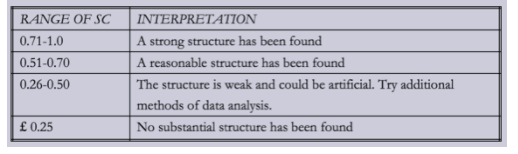

In [14]:
from IPython.display import Image
Image("C:\Users\user\switchdrive\TA/Information Analysis and Modeling/tutorials_material/tutorial_02/silhoutte.PNG")

### Find the best value of K

Often, the number of clusters to look for is not pre-defined. So finding the best K is part of the problem. One way to select the best k for our application is to apply the ***Average silhouette method***:

1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.

2. For each k, calculate the average silhouette of observations (avg.sil).

3. Plot the curve of avg.sil according to the number of clusters k.

4. The location of the maximum is considered as the appropriate number of clusters.

2 0.307427699345599
3 0.29158291788901636
4 0.2408872721312979
5 0.23442131409293707
6 0.22771634754853856
7 0.23176839616058273
8 0.20520382489937794
9 0.1814008001595425


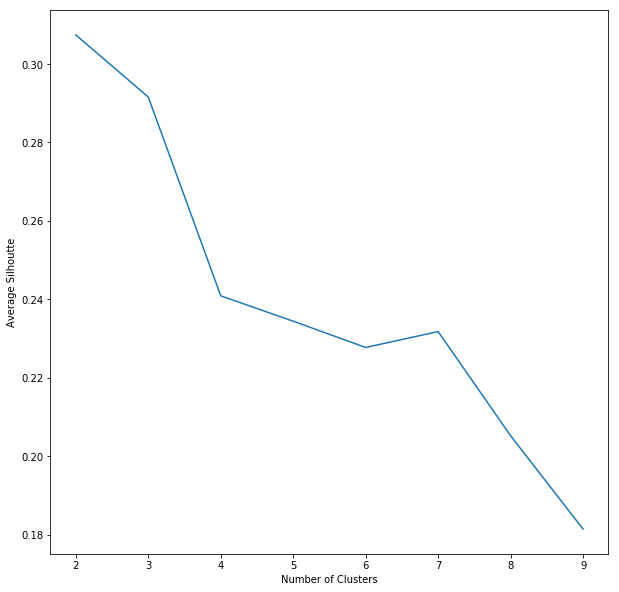

In [13]:
path = "C:\Users\user\switchdrive\TA/Information Analysis and Modeling/dataset/happiness_2017_2.csv"
db = pd.read_csv(path)
# Select the columns of the data set we are interested in:
db_subset = db[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] 
db_subset_scaled = scaler.fit_transform(db_subset)

silhouette = []
k = []
for n_clusters in range(2, 10):
    km = KMeans(n_clusters=n_clusters, init='random', random_state=4)
    cluster_labels = km.fit_predict(db_subset_scaled)
    silhouette_avg = metrics.silhouette_score(db_subset_scaled, cluster_labels)
    silhouette.append(silhouette_avg)
    k.append(n_clusters)
    print n_clusters, silhouette_avg
    

plt.plot(k,silhouette)
plt.xlabel("Number of Clusters")
plt.ylabel("Average Silhoutte")
plt.rcParams['figure.figsize']= (9, 5)

<font color='red', size="4"> Question: Which is the best number of clusters we should consider for increasing the silhouette?</font>

### Failure cases of K-Means

Even if you you know the right numer of clusters for a given data set, k-Means may not be able to recover them. Each cluster is defined solely by its center , which means that each cluster us a convex shape. As result of this is that k-Means can only capture relatively simple shapes. K-Means also assumes that all the clusters have the same "diameter" in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. K-means also assumes that all directions are equally important for each cluster and performs poorly if the clusters have more complex shapes as the two_moon data showed in the picture below:

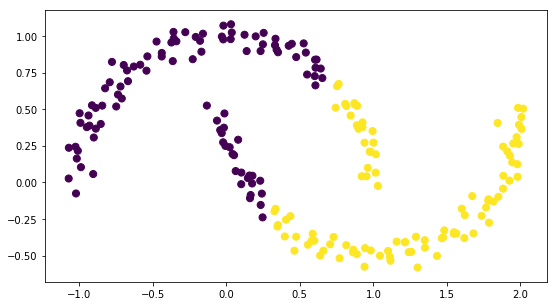

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### 6. Hierarchical  Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy.

###  Hierarchical Agglomerative Clustering (HAC)
Hierarchical agglomerative clustering refers to a collection of clustering algorithms that all build upon the same principles: The algorithm follows a bottom-up approach, it starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. Does not require the number of clusters k in advance.
The HAC starts with all instances in a separate cluster and then repeatedly joins the two clusters that are most similar until there is only one cluster. There are several linkage criteria that specify how exactly "most similar cluster" is measured. In scikit-learn we have:
1. "ward": default choice. merge the clusters in a way that the variance withing the all clusters increases the least. 
2. "average": merges the clusters that have the smallest average distanc between all their points
3. "complete": merges the two clusters that have the smallest maximum distance between their points.

The picture below describes the progression of agglomerative clustering on a 2D dataset looking for 3 clusters:

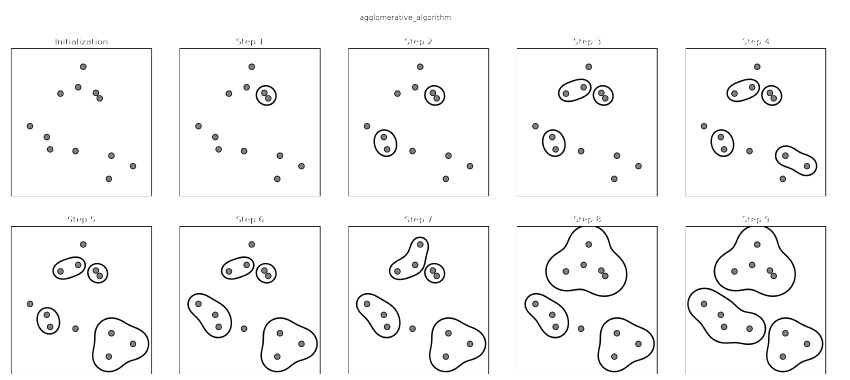

In [17]:
from IPython.display import Image
Image("C:\Users\user\switchdrive\TA/Information Analysis and Modeling/tutorials_material/tutorial_02/hac.PNG")

At the beginning, each point is a cluster. Them, the two closest clusters are merged. Until Step 4, two single-point clusters are merged together, in Step 5 a cluster of 3 is created, and so on. In step 9 we have only 3 clusters, because in this case it has been specified 3 as desired number of clusters.

### Dendrograms
Sometimes is helpful to look at all possible clustering jointly. The figure below shows an overlay of the possible clusterings, providing some insight into how each cluster  breaks up into smaller clusters:


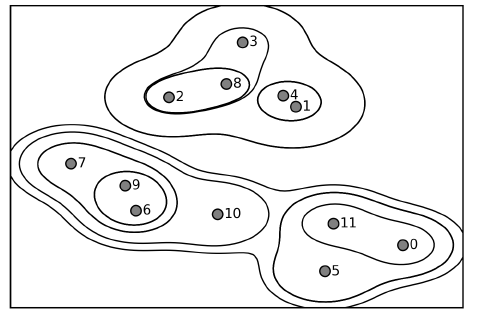

In [18]:
from IPython.display import Image
Image("C:\Users\user\switchdrive\TA/Information Analysis and Modeling/tutorials_material/tutorial_02/agglomerative.PNG")

While this visualization provides very detailed view of hierarchical clustering, it relies on the 2-dimensional nature of the data and can therefore not be used on datasets that have more than two features. Another tool to visualize hierarchical clustering is  a *** dendrogram ***. It shows data points as points on the bottom. Then a tree is plotted with these points (representing single-point clusters) as leafs, and a new node parent is added for each two clusters that are joined.

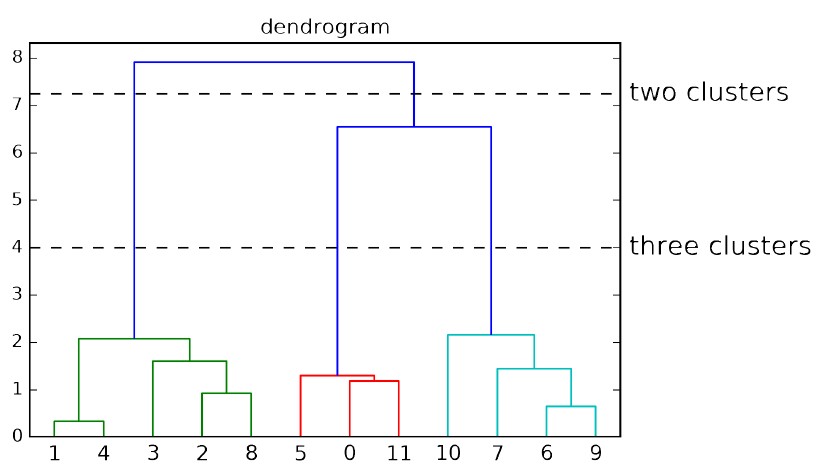

In [19]:
from IPython.display import Image
Image("C:\Users\user\switchdrive\TA/Information Analysis and Modeling/tutorials_material/tutorial_02/dendogram.PNG")

Reading from bottom to top, the data point 1 and 4 are joined first. Next, 6 and 9 and so on. The top level, there are two branches consisting of points: 11,0,5,10,7,6 and 9, and another one consisting of points: 1,4,3,2 and 8. these correspond to the two largest clusters. The length of each branch also shows how far apart the merged clusters are. The longest branches indicate that going from three to two clusters meant merging some very far-apart points. Here both 2 or 3 clusters are reasonable, deciding between the two depends on the application purpose and what between having more or less clusters is preferred. Dendrogram can be used to understand which is the best number of clusters for our goal. Usually HAC does'n need to know in advance how many clusters are required. However the scikit-learn implementation of HAC requires the number of clusters as parameter. So we can use the dendrogram for understanding how many clusters we need and then use this as parameter for our HAC model.

### 7. Build a  dendrogram for our data set 

Unfortunately dendrograms are not implemented in Scikit-learn, however we can use scipy for building them.

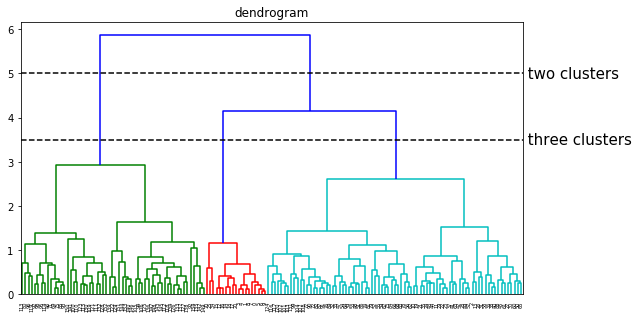

In [15]:
path = "C:\Users\user\switchdrive\TA/Information Analysis and Modeling/dataset/happiness_2017_2.csv"
db = pd.read_csv(path)
# Select the columns of the data set we are interested in:
db_subset = db[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] 
db_subset_scaled = scaler.fit_transform(db_subset)


# import the dendrogram function and the ward clustering function from scipy
from scipy.cluster.hierarchy import dendrogram, ward

# apply the ward clustering to the data set
# The scipy ward function returns an array that specifies the distances bridged when performing agglomerative 
linkage_array = ward(db_subset_scaled)

# W plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array);

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [5, 5], '--', c='k')
ax.plot(bounds, [3.5, 3.5], '--', c='k')
ax.text(bounds[1], 5, ' two clusters', verticalalignment='center', fontdict={'size': 15})
ax.text(bounds[1], 3.5, ' three clusters', verticalalignment='center', fontdict={'size': 15})
plt.title("dendrogram")
plt.rcParams['figure.figsize']= (40, 18)


<font color='red', size="4"> Question: How many clusters is the dendrogram suggesting to look for? </font>

### 8. Build HAC with Scikit-learn for our data set

In [7]:
#path = "C:\Users\user\switchdrive\TA/Information Analysis and Modeling/dataset/happiness_2017_2.csv"
db = pd.read_csv("happiness_2017_2.csv")
# Select the columns of the data set we are interested in:
db_subset = db[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] 
db_subset_scaled = scaler.fit_transform(db_subset)
# Initialize the HAC model, we consider as linkage modeL ward and 3 clusters. The Scikit-Learn implementation of HAC needs the 
# number of clusters 
model = AgglomerativeClustering(n_clusters=3, linkage = 'ward')
#del db_subset_scaled['agglomerative']

# HAC can not make predictions for new data points. Therefore HAC has not the predict method. To build the model and 
#get the labels we have to use the fit_predict method
clust_labels = model.fit_predict(db_subset_scaled)

# Create the data set and add the labels
db_subset_scaled = pd.DataFrame(db_subset_scaled)
agglomerative = pd.DataFrame(clust_labels)
db_subset_scaled.insert((db_subset_scaled.shape[1]),'agglomerative',agglomerative)


In [8]:
#Plot the clusters obtained using HAC considering the same features we considered previously
fig = plt.figure()

ax = fig.add_subplot(111)
scatter = ax.scatter(db['Economy..GDP.per.Capita.'],db['Happiness.Score'],
                     c=agglomerative[0],s=50)

ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Happiness')
plt.colorbar(scatter)
plt.rcParams['figure.figsize']= (5, 5)

*** Visualization of HAC Clusters Using Choropleth ***

In [10]:
data = [dict(type='choropleth',
             locations = db['Country'],
             locationmode = 'country names',
             z = db_subset_scaled['agglomerative'],
             text = db['Country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Grouping of Countries based on Agglomerative Clustering',
              geo=dict(showframe = False, 
                       projection = {'type':'Mercator'}))
map2 = dict(data=data, layout=layout)
iplot(map2)

Quick visual analysis of heat map of clustering of countries shows that k-means and HAC gives similar results. We can further compare which is the best algorithm for our data, using for example the silhouette score.

In [12]:
# Calculate the silhouette average score for this configuration
silhouette_avg = metrics.silhouette_score(db_subset_scaled, clust_labels)
print "Silhoutte average score:", silhouette_avg

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Silhoutte average score:", silhouette_avg)? (<ipython-input-12-1a6538f49361>, line 3)

We can observe that the silhouette average score is higher than the one obtained for k-Means. So the clustering with HAC in this case works better. Usually HAC algorithms are more suitable for small data set.

### Summary
The goal of this tutorial was to show two main techniques for performing clustering: k-Means and Hierarchical Agglomerative Clustering (HAC).

Clustering is the task of partitioning the data in groups called clusters. The points in a single cluster should be as similir as possible and the points in different groups as different as possible.  We first implemented the k-Means algorithm which tries to find cluster centers that are representative of certain regions in an iterative manner. In our case the algorithm divided the nations into 3 different groups based on their features. We underlined that one of the main problems of clustering algorithms is understainding whether the algorithm has performed well or not given the absence of labels. Even though usually a visual inspection is used to understand the behaviour of the algorithm, we saw that some metrics exist for judging the performance. In this tutorial we used the average silhouette. 

The number of clusters to find is not always specified, so understanding the right number of clusters is usually part of the problem. A way to solve this problem is by looking which of the values of k guarantees the best performance in respect of the metric of interest. In this case we tried with the silhouette and we observed that with 2 clusters we achieved the best performance.

Given the limitations of k-Means we tried also the HAC, this algorithm perform a bottom-top approach, e.g. starts considering each point as cluster and then groups together the similar clusters, it stops when a particular condition is met. Different metrics can be used to verify the similarity between clusters and decide whether to group them or not, we considered the ward. HAC usually doesn't need the specification of the numbe of clusters, however the scikit-learn implementation requires it. So we used a dendrogram to understand how many clusters we should look for. It resulted that 2 or 3 clusters are acceptable. Then we compute the average silhouette to verify which of the algorithms worked better for our data set. Our results show that HAC works better than k-Mean with a silhouette of 0.55.